# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

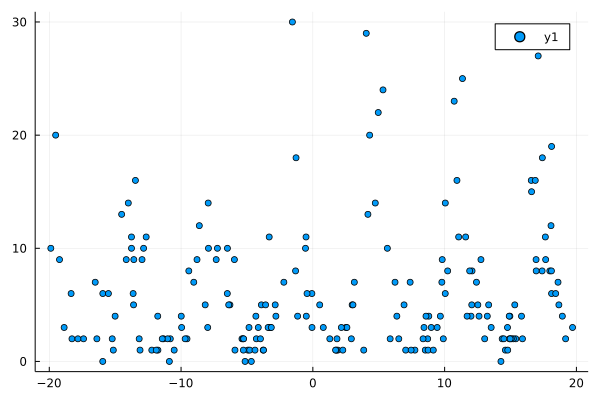

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -542.8799513624838
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.031671 seconds (6.81 M allocations: 414.608 MiB, 2.85% gc time, 97.54% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.5367602470739092, 0.27066971116803773, 0.4835957475338954, 0.4347399033145398, 0.19773156563452898, 0.5065376476926233, 0.5759227755296161, 0.20116676635415395, 0.32347941836578464, 0.18406565535076322  …  0.21760053690485884, 0.23431342663437402, 0.4329106640103956, 0.312794566222023, 0.22153037836667572, 0.22576942499502956, 0.4081190410897083, 0.4971060021725678, 0.4813967389588475, 0.24037715742001853], θ = [17.091599764299954, 2.981817672789446, 3.923825998424599, 2.953626559709499, 5.4821499741882835, 3.42703560637191, 2.9197393341234115, 4.983206262784885, 3.9654815081748427, 7.977489485932773  …  3.4862546656646893, 4.4795238690986565, 3.4463436297497347, 4.959628104175201, 3.4857561502959657, 4.978869435967248, 3.452215412159611, 3.429662601569322, 14.716880754441323, 4.478456530468689]), opt_state = (NamedTuple(),), hyperopt_state = (Na

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -682.4597657487107
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.083458 seconds (4.34 M allocations: 302.637 MiB, 3.59% gc time, 96.10% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 13.381292783443191) infered by Analytic Variational Inference , (local_vars = (c = [0.5233939923787285, 0.4563360651957971, 0.604220580559321, 0.6161586238700628, 0.23354446843367965, 0.6962618236952187, 0.7558027465402763, 0.17191527136949802, 0.25265257432866345, 0.33742397900317095  …  0.34931219386819534, 0.3475917641610634, 0.6032729351801022, 0.5015335922865084, 0.2485456690655014, 0.4038403710332402, 0.6127647592446024, 0.6915449150344203, 0.45728023064874135, 0.374022489597501], θ = [17.132796826031612, 4.473607406093704, 5.440400592249411, 4.637372297609918, 6.547826660644623, 5.202017885611078, 4.762822545727979, 5.911032887664609, 4.490171326029231, 9.25874697863681  …  4.791032056662574, 5.744259446321127, 5.057871029821488, 6.488969951894347, 4.545785494508964, 6.377636016891819, 5.149526938169959, 5.207938025469078, 14.864505216542597, 5.802511236235619], γ = [5.044275393554919, 8.101944530028733, 8.209836815659

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

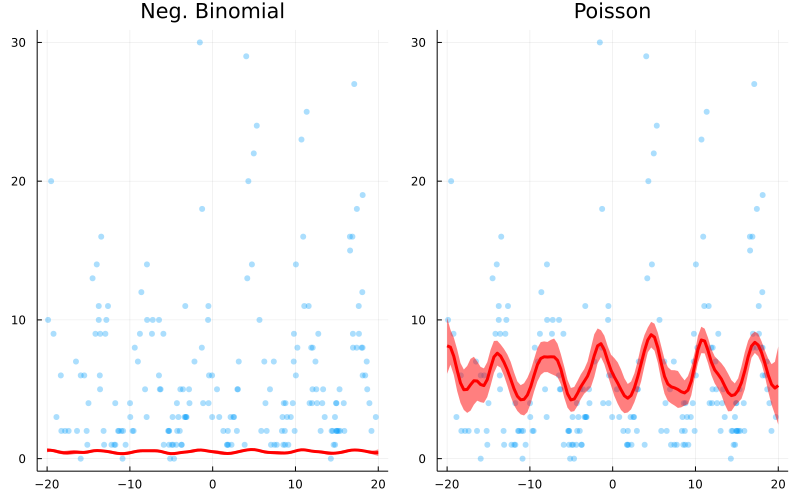

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*